# Applied Data Science with Python
## Part 4
### EDA
### Importing Important Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math

d:\VSCodePrograms\CapStone\CapStone4\.venv\Scripts\python.exe


### References to the Data Architecture

| Column       | Type        | Subtype   | Notes                                      |
|--------------|-------------|-----------|--------------------------------------------|
| visits       | Numerical   | Discrete  | Count of visits                            |
| nvisits      | Numerical   | Discrete  | Count                                      |
| ovisits      | Numerical   | Discrete  | Count                                      |
| novisits     | Numerical   | Discrete  | Count                                      |
| emergency    | Numerical   | Discrete  | Emergency visit count                      |
| hospital     | Numerical   | Discrete  | Hospital visit count                       |
| health       | Categorical | Ordinal   | Poor < Fair < Good < Excellent             |
| chronic      | Numerical   | Discrete  | Number of chronic conditions               |
| adl          | Categorical | Ordinal   | Activities of daily living score           |
| region       | Categorical | Nominal   | North, South, East, West                   |
| age          | Numerical   | Continuous| Age in years                               |
| gender       | Categorical | Nominal   | Male/Female/Other                          |
| married      | Categorical | Nominal   | Marital status                             |
| school       | Numerical   | Discrete  | Education level (years or coded levels)    |
| income       | Numerical   | Continuous| Raw income                                 |
| employed     | Categorical | Nominal   | Employment status                          |
| insurance    | Categorical | Nominal   | Insurance coverage                         |
| medicaid     | Categorical | Nominal   | Medicaid coverage                          |

### High Level Overview

In [695]:
### import csv file
data = pd.read_csv('NSMES1988_Dirty.csv')
print("Display Data head:")
print(data.head())
#Create new pandas dataframe
df = pd.DataFrame(data)

Display Data head:
   visits  nvisits  ovisits  novisits  emergency  hospital   health  chronic  \
0    5.00     0.00     0.00      0.00       0.00      1.00  average     2.00   
1    1.00     0.00     2.00      0.00       2.00      0.00  average     2.00   
2   13.00     0.00     0.00      0.00       3.00      3.00     poor     4.00   
3   16.00     0.00     5.00      0.00       1.00      1.00     poor     2.00   
4    3.00     0.00     0.00      0.00        NaN      0.00  average     2.00   

       adl region  age  gender married  school  income employed insurance  \
0   normal  other 7.12    male     yes    6.00    3.11      yes       yes   
1   normal  other 7.68  female     yes   10.00    2.77       no       yes   
2  limited  other  NaN  female      no   10.00     NaN       no        no   
3  limited  other 7.81    male     yes    3.00    0.90       no       yes   
4  limited  other 8.13  female     yes    6.00    0.83       no       yes   

  medicaid  
0       no  
1       no 

In [696]:
print("**Display basic statistics:**")
print(data.describe())

print("\n**Display basic statistics:**")

# Format floats
pd.options.display.float_format = '{:,.2f}'.format

summary = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Rename Columns for Readability
summary = summary.rename(columns={
    '10%': 'P10',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    '90%': 'P90'
})

print(summary.to_string())

**Display basic statistics:**
        visits  nvisits  ovisits  novisits  emergency  hospital  chronic  \
count 4,186.00 4,186.00 4,186.00  4,186.00   4,186.00  4,186.00 4,186.00   
mean      6.01     1.62     0.73      0.55       0.26      0.30     1.54   
std       7.36     5.31     3.59      4.12       0.69      0.76     1.35   
min      -2.00    -1.00    -1.00     -1.00       0.00      0.00     0.00   
25%       1.00     0.00     0.00      0.00       0.00      0.00     1.00   
50%       4.00     0.00     0.00      0.00       0.00      0.00     1.00   
75%       8.00     1.00     0.00      0.00       0.00      0.00     2.00   
max      94.00   103.00   139.00    162.00      12.00      8.00     8.00   

           age   school   income  
count 4,186.00 4,186.00 4,186.00  
mean      8.02    10.31     2.69  
std       2.90     3.74     3.24  
min       6.73    -1.00    -1.19  
25%       7.12     8.00     0.95  
50%       7.54    11.00     1.78  
75%       8.07    12.00     3.31  
max  

Columns like visits, nvisits, ovisits, novisits contain negative values which is **impossible** and they also have extreme outliers (All Visits, hospital, income).</br>
Age and Income need to be restructured.


### Plotting the Data to see Mean, Median, Standard-Deviation, and Skewness

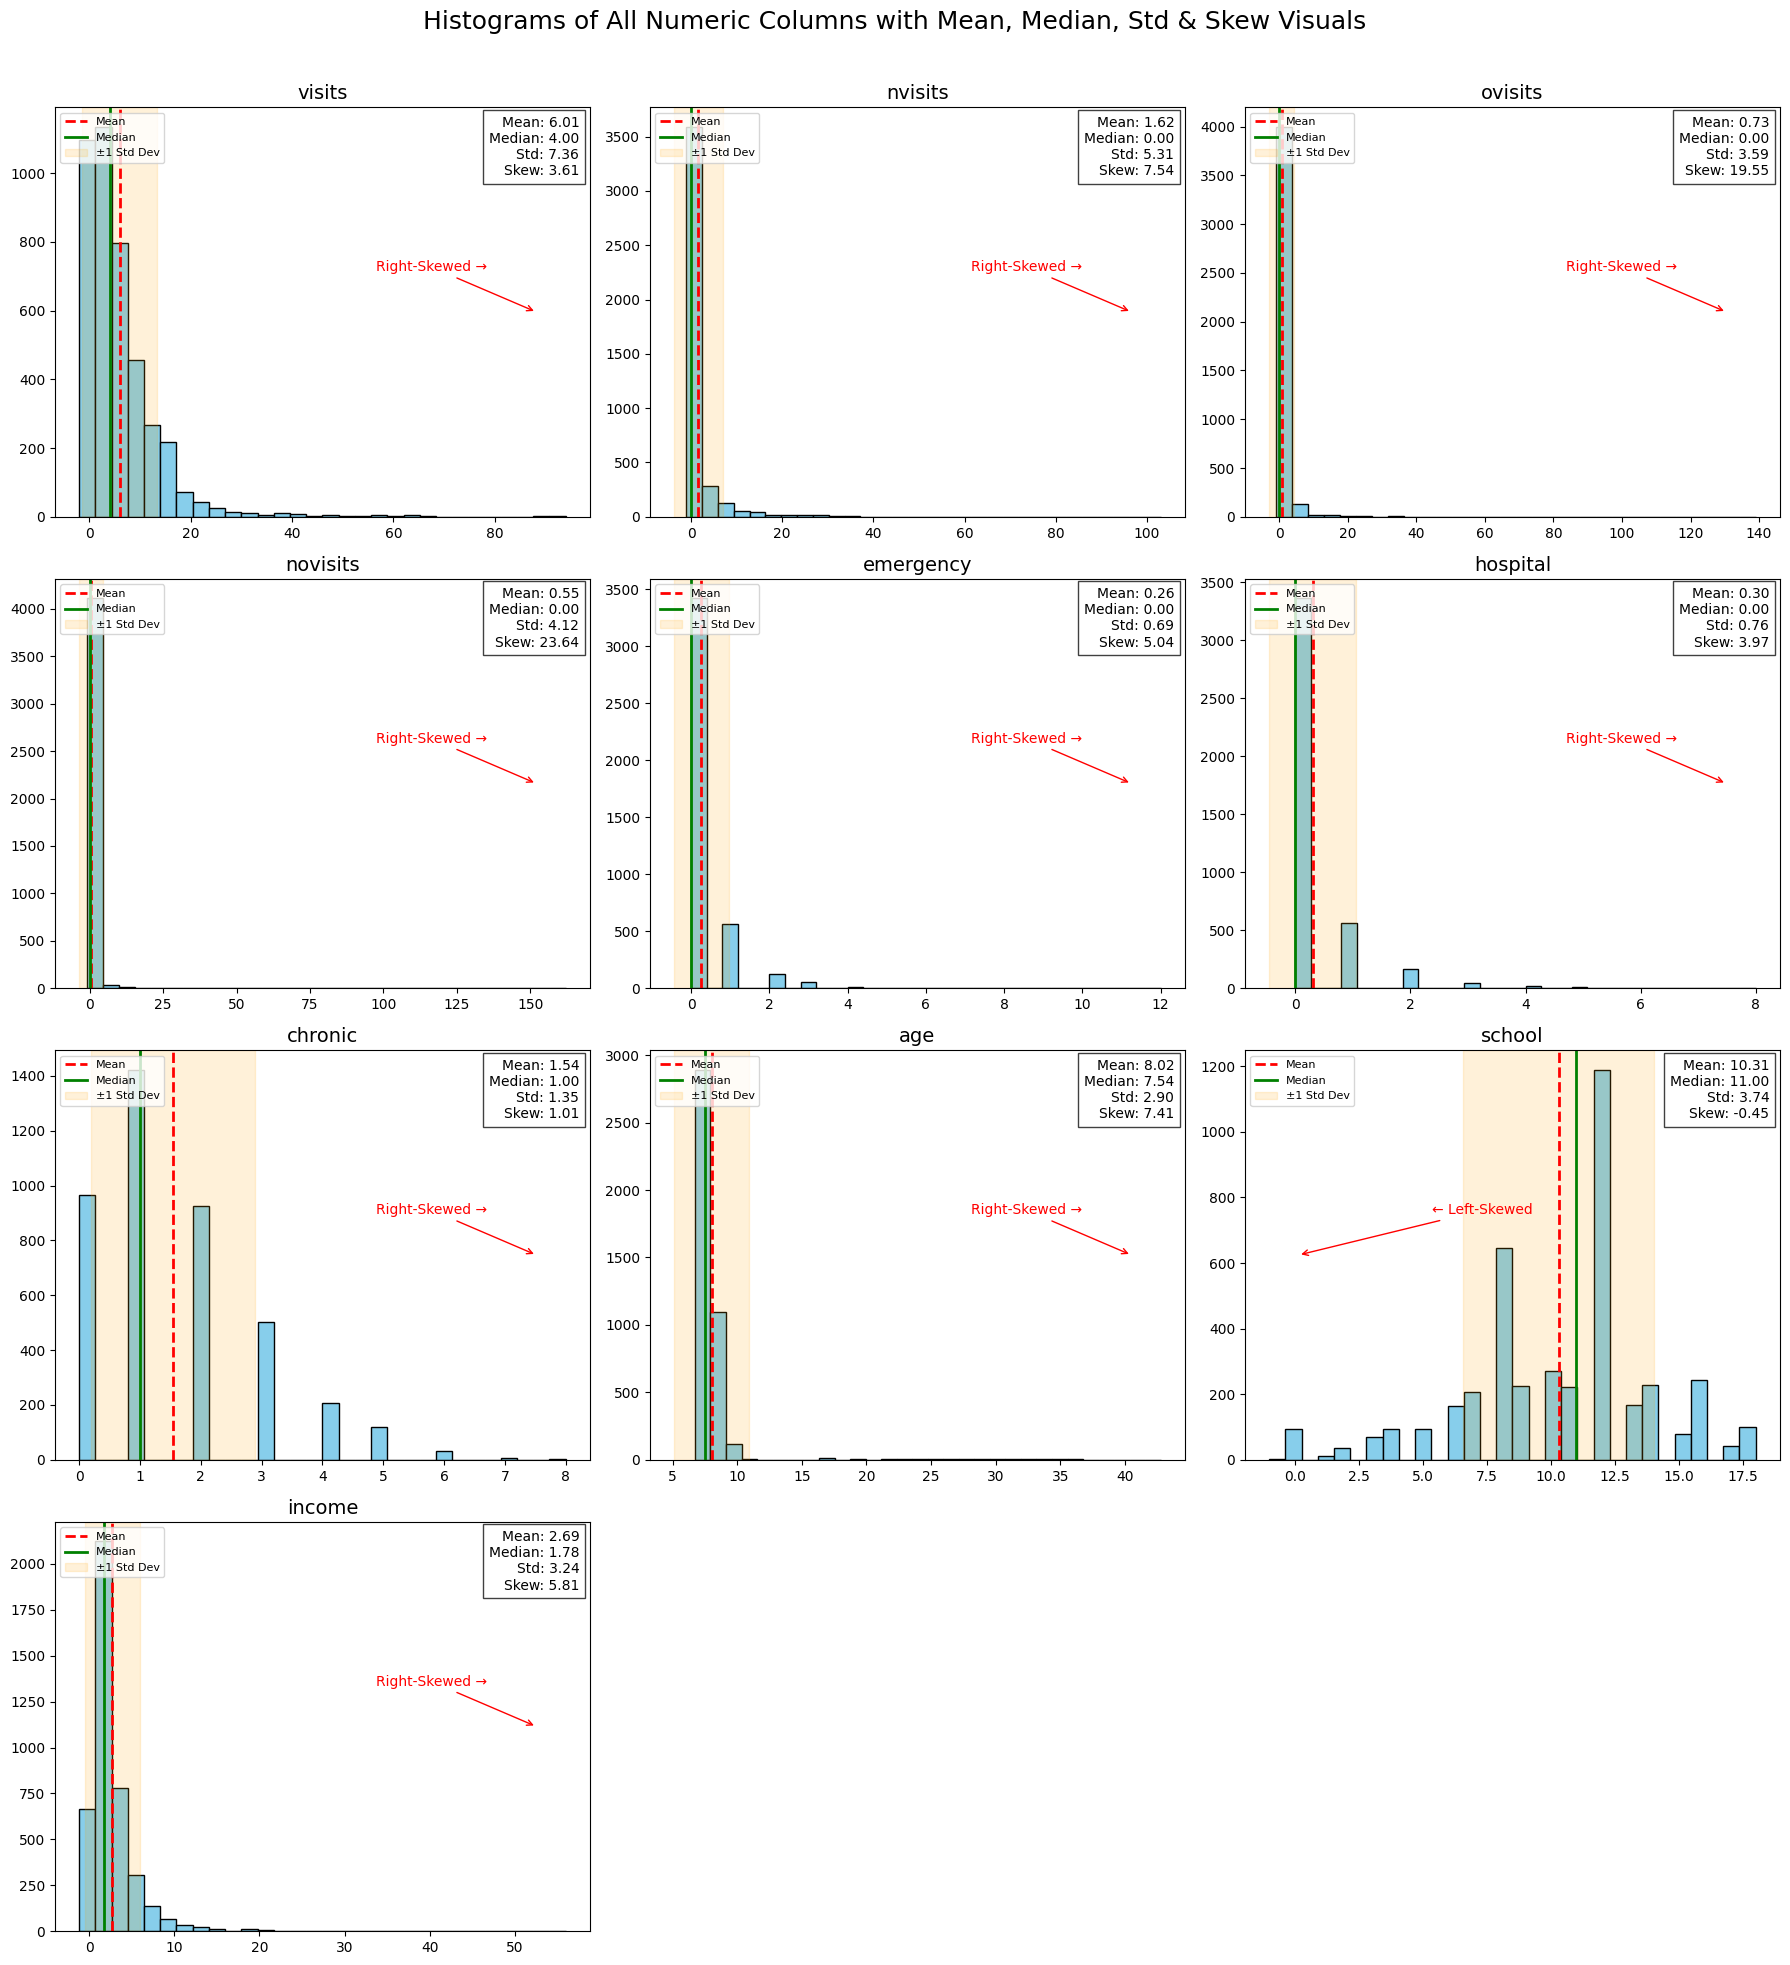

In [697]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Grid
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    data = df[col].dropna()

    # Statistical calc
    col_mean = data.mean()
    col_median = data.median()
    col_std = data.std()
    col_skew = skew(data)

    # Plot
    ax = plt.subplot(n_rows, n_cols, i)
    ax.hist(data, bins=30, edgecolor='black', color='skyblue')
    ax.set_title(col, fontsize=14)

    # Visual markers
    ax.axvline(col_mean, color='red', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(col_median, color='green', linestyle='-', linewidth=2, label='Median')
    ax.axvspan(col_mean - col_std, col_mean + col_std,
               color='orange', alpha=0.15, label='±1 Std Dev')

    # Stats text box
    stats_text = (
        f"Mean: {col_mean:.2f}\n"
        f"Median: {col_median:.2f}\n"
        f"Std: {col_std:.2f}\n"
        f"Skew: {col_skew:.2f}"
    )

    ax.text(
        0.98, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        va='top', ha='right',
        bbox=dict(facecolor='white', alpha=0.75)
    )

    # Skew direction
    if col_skew > 0.3:
        ax.annotate("Right-Skewed →",
                    xy=(0.9, 0.5), xycoords='axes fraction',
                    xytext=(0.6, 0.6), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle="->", color='red'),
                    fontsize=10, color='red')
    elif col_skew < -0.3:
        ax.annotate("← Left-Skewed",
                    xy=(0.1, 0.5), xycoords='axes fraction',
                    xytext=(0.35, 0.6), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle="->", color='red'),
                    fontsize=10, color='red')
    else:
        ax.text(
            0.02, 0.02, "≈ Symmetric",
            transform=ax.transAxes,
            fontsize=10, color='green'
        )

    # Legend
    ax.legend(fontsize=8, loc='upper left')

plt.suptitle("Histograms of All Numeric Columns with Mean, Median, Std & Skew Visuals",
             fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

A lot of columns are **skewed especially to the right**</br>
There are **long tails and weird spikes** that hint at dirty or **inconsistent data**</br>
There are clear **extreme high values** since the data **stretches far past the standard-deviation area**
The **mean is usually way higher than the median**, which confirms the skew and **uneven distribution**
The data is messy, skewed, and influenced by outliers

### BoxPlot for our Outliers

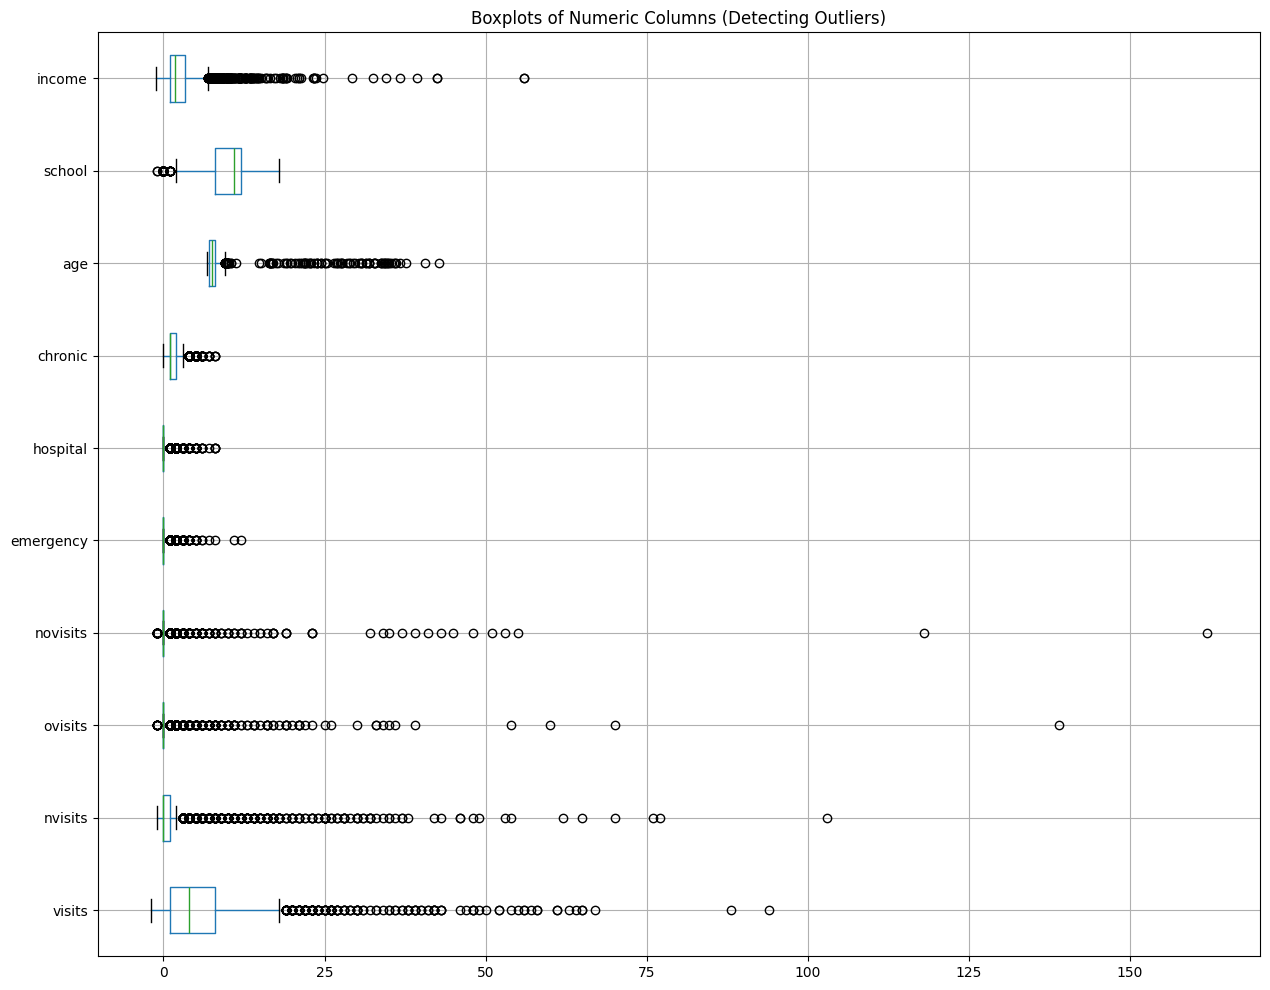

In [698]:
plt.figure(figsize=(15, 12))
df.boxplot(vert=False)
plt.title("Boxplots of Numeric Columns (Detecting Outliers)")
plt.show()

All numerical column has **major outliers**, especially on the **high end**</br>

**Negative values clearly show up as outliers**</br>

**Spread is quite large** for many features showing **high variability**</br>

### KDE Distribution Analysis

In [699]:
df_clean = df.copy()

# Remove negative values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df_clean[col] = df_clean[col].apply(lambda x: np.nan if x < 0 else x)

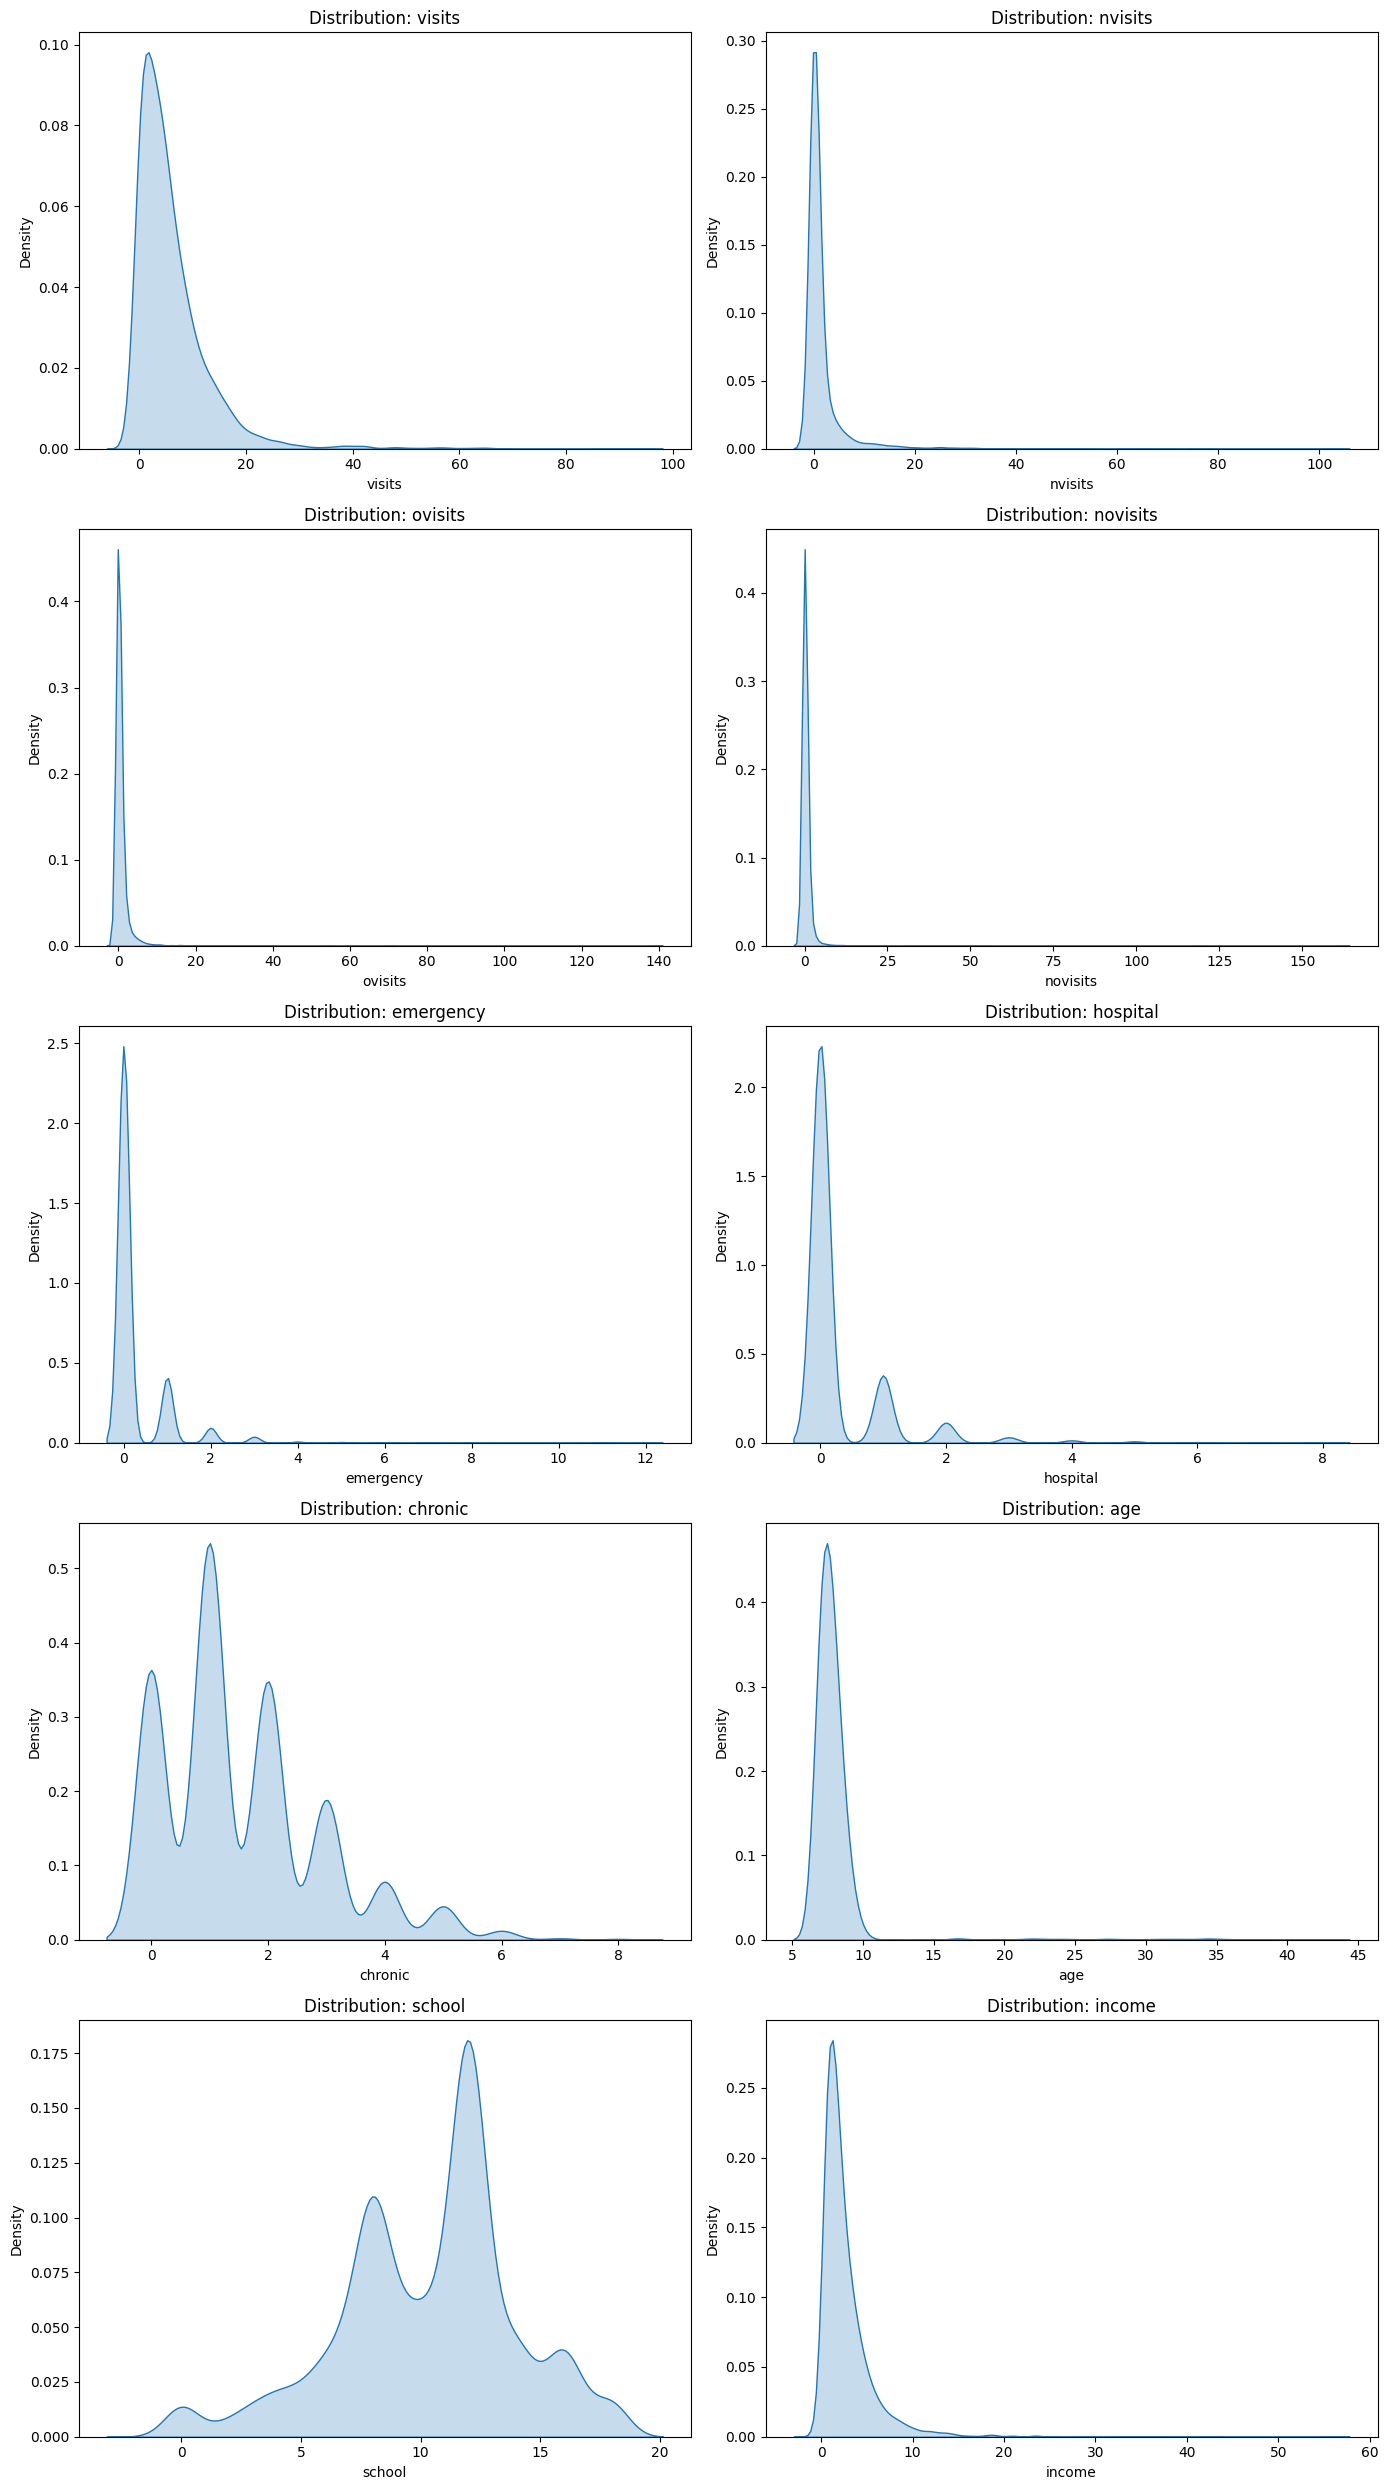

In [700]:
# Numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plots_per_row = 2
n_rows = int(np.ceil(len(numeric_cols) / plots_per_row))

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):

    plt.subplot(n_rows, plots_per_row, i)

    sns.kdeplot(df[col].dropna(), fill=True)

    plt.title(f"Distribution: {col}", fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Conclusion from EDA

**Extreme values heavily distort the full distribution** making everything look more skewed</br>
It also shows whether the **“normal” part of the data behaves differently** than the extremes</br>
These plots help show proof of **transformations or outlier handling** because they show how much the **extremes are pulling the data**</br>

### Next Steps
**Fix** invalid values like **negatives**, age, income etc.</br>
**Handle** extreme **outliers** or **cap high values**</br>
**Apply transformations (log)** to reduce skew</br>
**Prepare features for modeling** once distributions are stabilized</br>

### DATA WRANGLING
### Creating a Working Copy (Cleaned Data)

In [701]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4186 non-null   float64
 1   nvisits    4186 non-null   float64
 2   ovisits    4186 non-null   float64
 3   novisits   4186 non-null   float64
 4   emergency  4186 non-null   float64
 5   hospital   4186 non-null   float64
 6   health     4406 non-null   object 
 7   chronic    4186 non-null   float64
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4186 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4186 non-null   float64
 14  income     4186 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4285 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(10), object(8)
memory usage: 619.7+ KB


I am trying to avoid overwriting the original dataset and also manage dataframes properly.

### Is Age transformable??

In [702]:
df_age = df[['age']].copy()
df_age['age_years'] = df_age['age'] * 10
print(df_age['age_years'].describe())

count   4,186.00
mean       80.24
std        29.05
min        67.27
25%        71.21
50%        75.38
75%        80.74
max       427.69
Name: age_years, dtype: float64


But Looking at Age I have noticed the highest value is 42.7. I was initially thinking that maybe I can start off with manipulating age by making it somehow into a 2 digit number but that's not possible if the max age is 42.7 and the min is 6.7 I can transform 6.7 into 67 but 42.7 would also convert to 427 which doesnt make sense.

### Make Extreme Outliers as Naan instead? (age)

In [703]:
df_age = df[['age']].copy()
df_age['age_years'] = df_age['age'] * 10

min_age = 50
max_age = 110
invalid_age_mask = (df_age['age_years'] < min_age) | (df_age['age_years'] > max_age)
print("Number of clearly invalid ages (after *10):", invalid_age_mask.sum())

df_age.loc[invalid_age_mask, 'age_years'] = np.nan
print(df_age['age_years'].describe())

Number of clearly invalid ages (after *10): 85
count   4,101.00
mean       76.42
std         6.53
min        67.27
25%        71.16
50%        75.24
75%        80.32
max       105.42
Name: age_years, dtype: float64


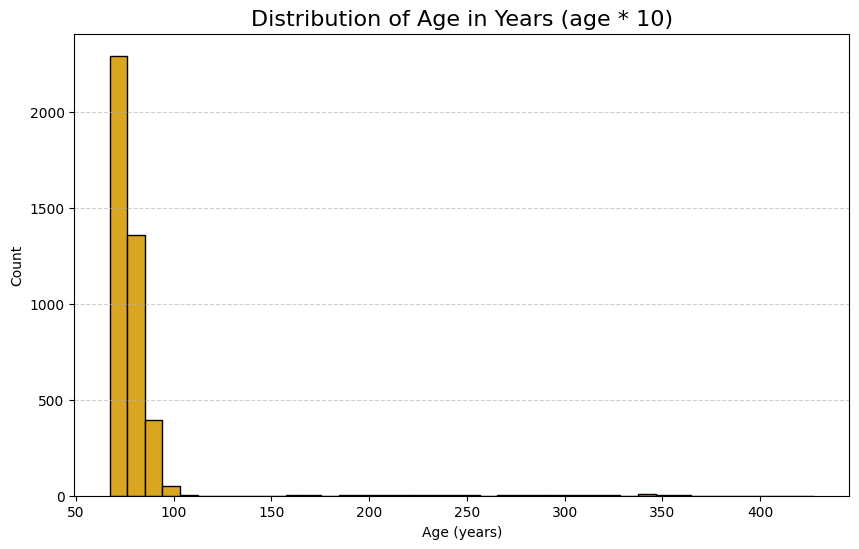

In [704]:
age_years = df['age'] * 10

plt.figure(figsize=(10, 6))
plt.hist(age_years, bins=40, edgecolor='black', color='goldenrod')
plt.title("Distribution of Age in Years (age * 10)", fontsize=16)
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Interpreted `age` as decades and created `age_years = age * 10`. Most transformed ages fall into a realistic older-adult range (~65–85). Clearly impossible values (e.g., >110) were set to `NaN` to preserve valid data while preventing corruption of analyses.


In [705]:
# Cleaned Copy
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Negative Count
neg_counts = (df_clean[numeric_cols] < 0).sum().sort_values(ascending=False)
print("Negative value counts per numeric column:\n")
print(neg_counts)

rows = []
for col in numeric_cols:
    negs = df_clean[df_clean[col] < 0][col]
    for idx, val in negs.items():
        rows.append({'column': col, 'index': idx, 'value': val})

neg_table = pd.DataFrame(rows)
neg_table

Negative value counts per numeric column:

nvisits      101
visits        49
novisits      30
income        19
ovisits       11
school         2
hospital       0
emergency      0
age            0
chronic        0
dtype: int64


,column,index,value
0,visits,130,-1.00
1,visits,199,-2.00
2,visits,221,-1.00
3,visits,442,-1.00
4,visits,568,-1.00
...,...,...,...
207,income,2897,-0.12
208,income,2952,-0.23
209,income,3173,-0.12
210,income,3174,-0.01


In [706]:
school = df_clean['school']

neg_before = (school < 0).sum()
dec_before = school.apply(lambda x: not float(x).is_integer()).sum()

print(f"Negative values in 'school' before cleaning: {neg_before}")
print(f"Decimal (non-whole) values in 'school' before cleaning: {dec_before}")

# Set negative values to NaN
df_clean.loc[df_clean['school'] < 0, 'school'] = np.nan

# Convert remaining values
mask = df_clean['school'].notna()
df_clean.loc[mask, 'school'] = np.floor(df_clean.loc[mask, 'school'])

school_after = df_clean['school']

neg_after = (school_after < 0).sum()
dec_after = school_after.dropna().apply(lambda x: not float(x).is_integer()).sum()

print(f"\nNegative values in 'school' after cleaning: {neg_after}")
print(f"Decimal (non-whole) values in 'school' after cleaning: {dec_after}")

Negative values in 'school' before cleaning: 2
Decimal (non-whole) values in 'school' before cleaning: 220

Negative values in 'school' after cleaning: 0
Decimal (non-whole) values in 'school' after cleaning: 0


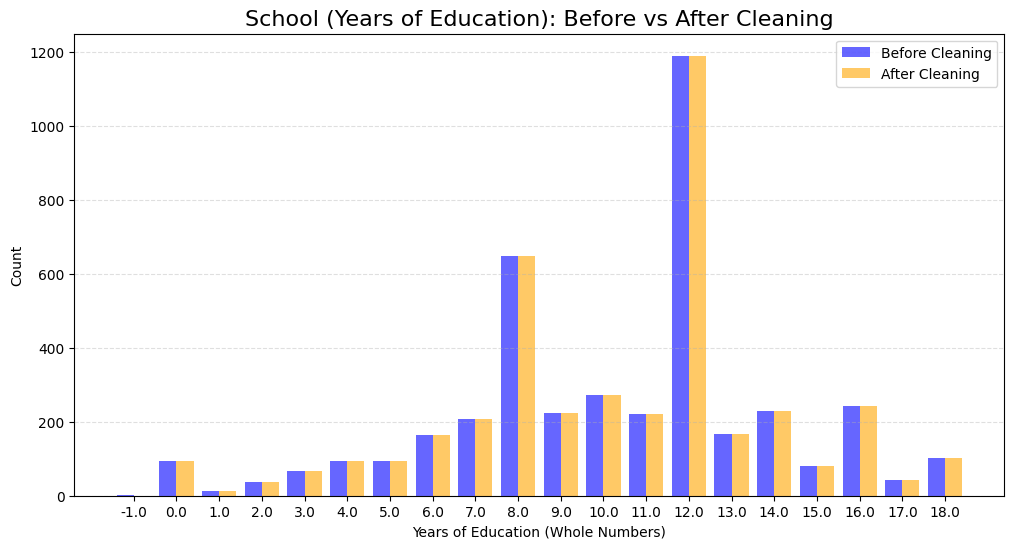

In [707]:
df_original = df.copy()
df_cleaned = df_clean.copy()


mask = df_cleaned['school'].notna()
df_cleaned.loc[mask, 'school'] = np.floor(df_cleaned.loc[mask, 'school'])

# Frequency Tables
orig_counts = df_original['school'].value_counts().sort_index()
clean_counts = df_cleaned['school'].value_counts().sort_index()

# Index to cover all years
all_years = sorted(set(orig_counts.index).union(clean_counts.index))
orig_counts = orig_counts.reindex(all_years, fill_value=0)
clean_counts = clean_counts.reindex(all_years, fill_value=0)

# Side by side
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(all_years))
plt.bar(x - bar_width/2, orig_counts, width=bar_width, color='blue', alpha=0.6, label='Before Cleaning')
plt.bar(x + bar_width/2, clean_counts, width=bar_width, color='orange', alpha=0.6, label='After Cleaning')
plt.title("School (Years of Education): Before vs After Cleaning", fontsize=16)
plt.xlabel("Years of Education (Whole Numbers)")
plt.ylabel("Count")
plt.xticks(x, all_years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Cleaning the `school` Column

For the `school` variable, which represents years of education

1. **Negative values** are not meaningful for years of schooling, so I convert negative `school` values to `NaN`.
2. Education is naturally counted in **whole years**, so for the remaining non-missing values, I removed the decimal part.

This keeps valid values, gets rid of impossible negatives, and makes `school` easier to interpret as whole years of education.

### Cleaning All Negative Values
At this point I am assuming we have cleared out the majority issues that seemed kind of odd in our data.

In [708]:
negatives_before = (df_clean[numeric_cols] < 0).sum()
print("Negative values before cleaning:\n", negatives_before)

# Replace with naan
for col in numeric_cols:
    df_clean.loc[df_clean[col] < 0, col] = np.nan

# Check negatives after cleaning
negatives_after = (df_clean[numeric_cols] < 0).sum()
print("\nNegative values after cleaning:\n", negatives_after)

Negative values before cleaning:
 visits        49
nvisits      101
ovisits       11
novisits      30
emergency      0
hospital       0
chronic        0
age            0
school         0
income        19
dtype: int64

Negative values after cleaning:
 visits       0
nvisits      0
ovisits      0
novisits     0
emergency    0
hospital     0
chronic      0
age          0
school       0
income       0
dtype: int64


Looks good all negatives are removed from the data.

Checking how many values changed during cleaning to see whether the fixes made a meaningful impact on each numeric column.

In [709]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    changed = (df[col].fillna(0) != df_clean[col].fillna(0)).sum()
    print(f"{col}: {changed} values changed")

visits: 49 values changed
nvisits: 101 values changed
ovisits: 11 values changed
novisits: 30 values changed
emergency: 0 values changed
hospital: 0 values changed
chronic: 0 values changed
age: 0 values changed
school: 2 values changed
income: 19 values changed


Only a small number of values changed, meaning cleaning was minimal, targeted, and didn’t distort the dataset. The data is now cleaner but still preserves the original patterns.

Time to plot this to visualize which areas has change.

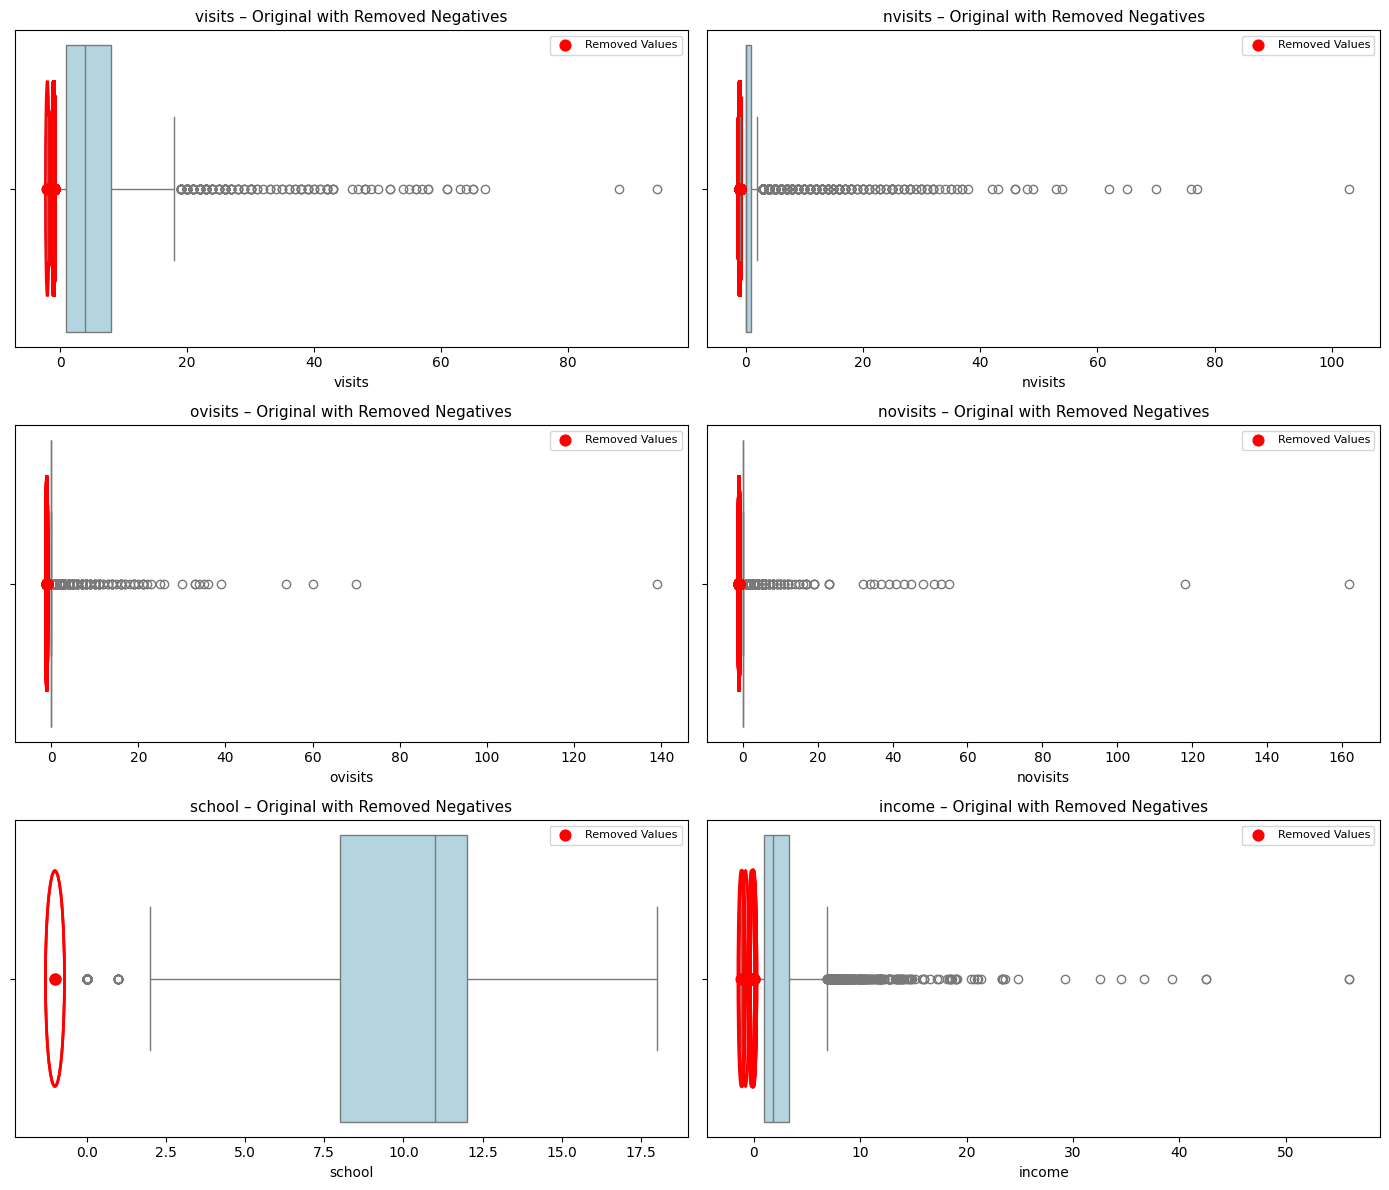

In [710]:
# Columns that actually changed during cleaning
changed_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'school', 'income']

plots_per_row = 2
n_rows = math.ceil(len(changed_cols) / plots_per_row)

plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(changed_cols, 1):
    # Negative values that were removed for this column
    removed = df[df[col] < 0][col]

    ax = plt.subplot(n_rows, plots_per_row, i)

    # Boxplot
    sns.boxplot(x=df[col], color='lightblue', ax=ax)

    # Overlay removed values in red
    if len(removed) > 0:
        # Scatter the removed values at y=0
        ax.scatter(removed, [0] * len(removed),
                   color='red', s=60, label='Removed Values', zorder=5)

        # Red Circle
        for val in removed:
            circ = plt.Circle((val, 0), radius=0.3,
                              edgecolor='red', facecolor='none', linewidth=2)
            ax.add_patch(circ)

    ax.set_title(f"{col} – Original with Removed Negatives", fontsize=11)
    ax.set_xlabel(col)

    if len(removed) > 0:
        ax.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()

The highlighted boxplots show that only a few columns had invalid negative values, and those values were clearly outside the normal range. Removing them fixed obvious errors without changing the overall distribution, meaning the data is now cleaner and more reliable while still preserving the real patterns.

### Imputation Time
We created missing values (naan) during  cleaning removing invalid negatives, so we will fill them using the median to keep the data realistic and ready for modeling.
We will be replacing the naan with median values because unlike mean, the median isn't skewed by extreme outliers. So we won't distort the dataset too much.

In [711]:
# Columns to impute
impute_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'school', 'income']

for col in impute_cols:
    median_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_value)

print("✅ Imputation completed!")
print(df_clean[impute_cols].isna().sum())

✅ Imputation completed!
visits      0
nvisits     0
ovisits     0
novisits    0
school      0
income      0
dtype: int64


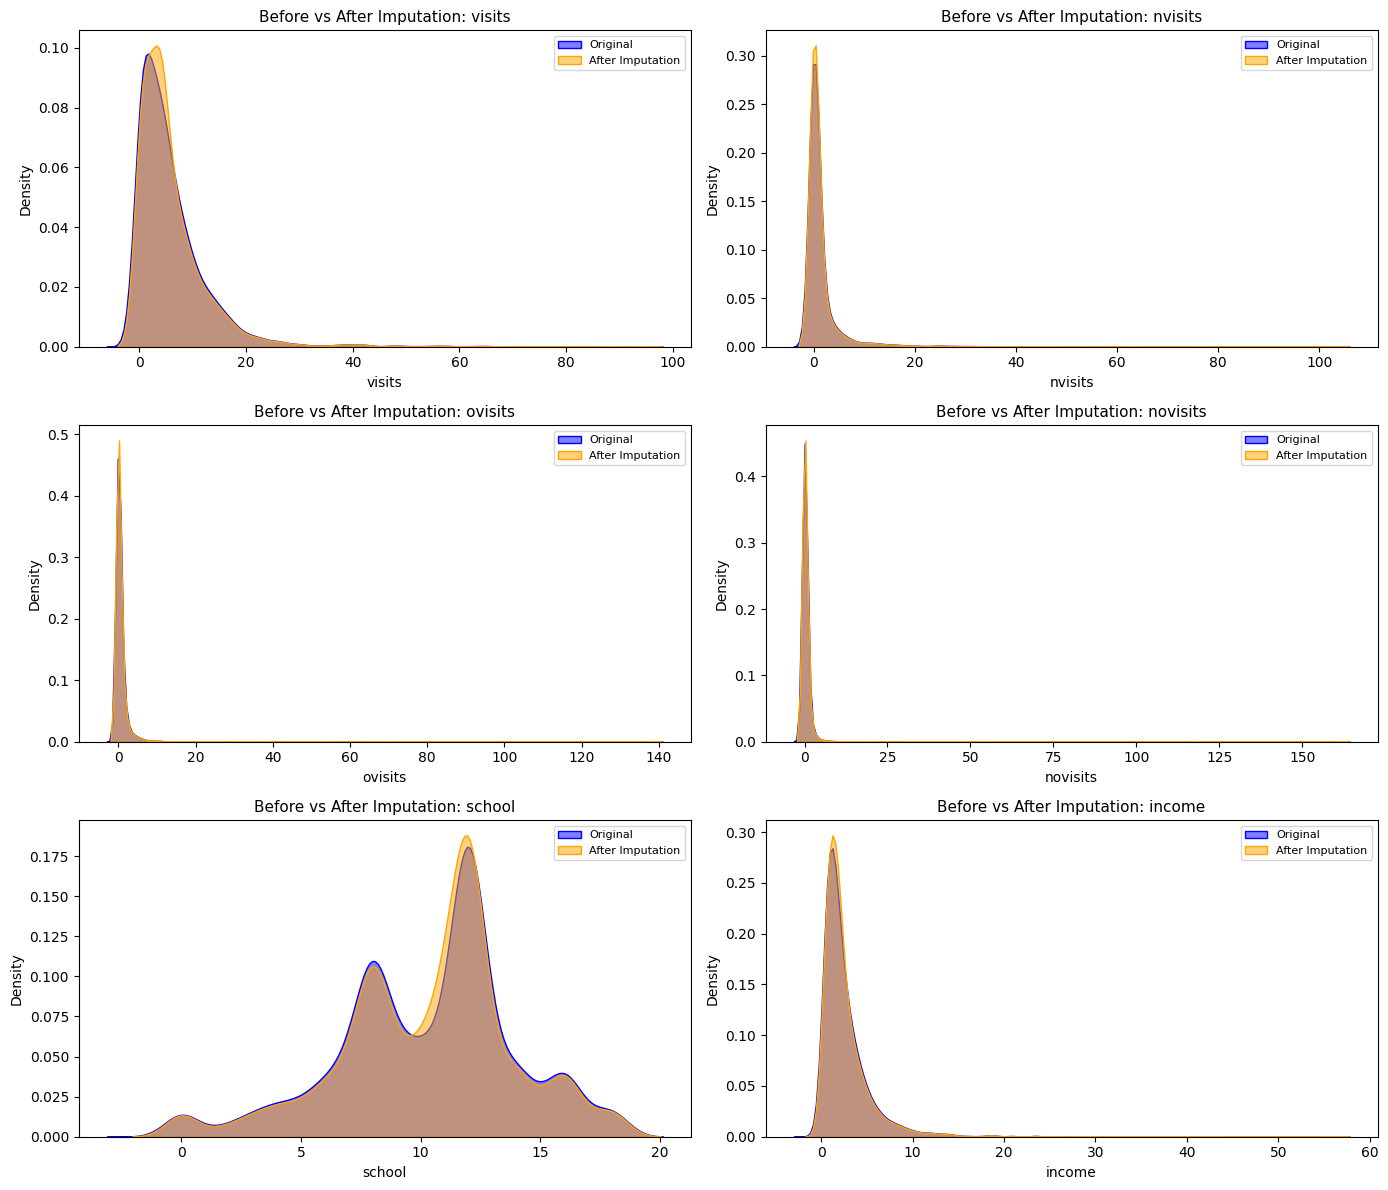

In [712]:
# Columns you imputed
impute_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'school', 'income']

plots_per_row = 2
n_rows = math.ceil(len(impute_cols) / plots_per_row)

plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(impute_cols, 1):
    ax = plt.subplot(n_rows, plots_per_row, i)

    # Original distribution
    sns.kdeplot(df[col].dropna(), fill=True, color='blue',
                alpha=0.5, label='Original', ax=ax)

    # After Imputation distribution
    sns.kdeplot(df_clean[col].dropna(), fill=True, color='orange',
                alpha=0.5, label='After Imputation', ax=ax)

    ax.set_title(f"Before vs After Imputation: {col}", fontsize=11)
    ax.set_xlabel(col)

    ax.legend(fontsize=8)

plt.tight_layout()
plt.show() 

Missing values are gone, distributions are stable, and df_clean is now ready for feature engineering.</br>
I must admit I kept trying to see cleaned and original values but everytime I would plot it I wouldn't see a difference but after enough research I understood that we needed to do imputation to really show a difference. So I am actually really happy to present the real differences in the data.
Also everytime I was changing naan values or invalid values I kept trying to plot it but later I realized that I was changing a very minute amount of data from the bigger picture which obviously would not make a difference at all.

### Feature Engineering
In my feature engineering I am interested in a few things. One is what is the total visits per patient and the count on that, to see where people are.
With the help of total visits I want to see how many people use more health care than the average which I plan on doing through understanding the margin, and finally back to my favorite which is are people earning more through having more education ?

In [713]:
# Calculate total visits
df_clean['total_visits'] = df_clean[['visits','nvisits','ovisits','novisits','emergency','hospital']].sum(axis=1)

# Flag high utilizers (top 10%)
df_clean['high_utilizer'] = (df_clean['total_visits'] >= df_clean['total_visits'].quantile(0.90)).astype(int)

In [714]:
df_fe = df_clean.copy()

# Health Care Utilization Features
visit_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital']
df_fe['total_visits'] = df_fe[visit_cols].sum(axis=1)

# High Utilizer Flag (Top 10%)
threshold = df_fe['total_visits'].quantile(0.90)
df_fe['high_utilizer'] = (df_fe['total_visits'] >= threshold).astype(int)

print(df_fe[['total_visits', 'high_utilizer']].head())

   total_visits  high_utilizer
0          6.00              0
1          5.00              0
2         19.00              0
3         23.00              1
4          3.00              0


Thinking about calcualting Interquartile range for total visits, just to get an idea of how we can make this graph look more appealing. No data is being changed here.

In [715]:
Q1 = df_fe['total_visits'].quantile(0.05)
Q3 = df_fe['total_visits'].quantile(0.93)
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR

# Filter
tv_no_outliers = df_fe[df_fe['total_visits'] <= upper_bound]['total_visits']

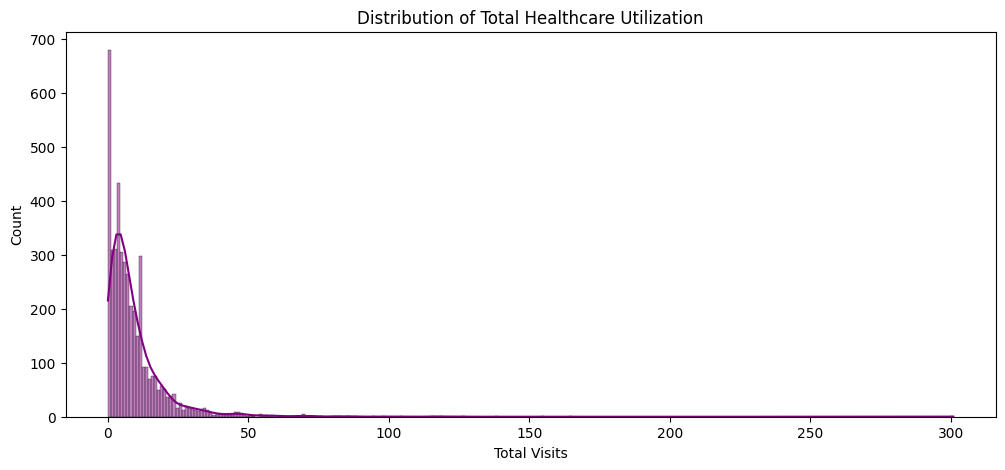

In [716]:
plt.figure(figsize=(12,5))
sns.histplot(df_fe['total_visits'], kde=True, color='purple')
plt.title("Distribution of Total Healthcare Utilization")
plt.xlabel("Total Visits")
plt.ylabel("Count")
plt.show()

I reisized the graph just to see the more important things in the data rather than the outliers which first of all ruins the aesthetics of the graph and the information audience will more likely feel more interested in.

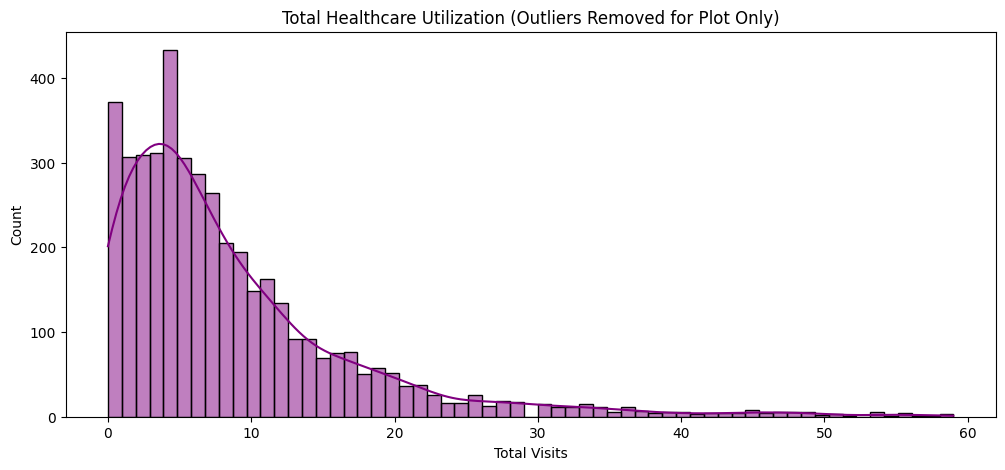

In [717]:
plt.figure(figsize=(12,5))
sns.histplot(tv_no_outliers, kde=True, color='purple')
plt.title("Total Healthcare Utilization (Outliers Removed for Plot Only)")
plt.xlabel("Total Visits")
plt.ylabel("Count")
plt.show()

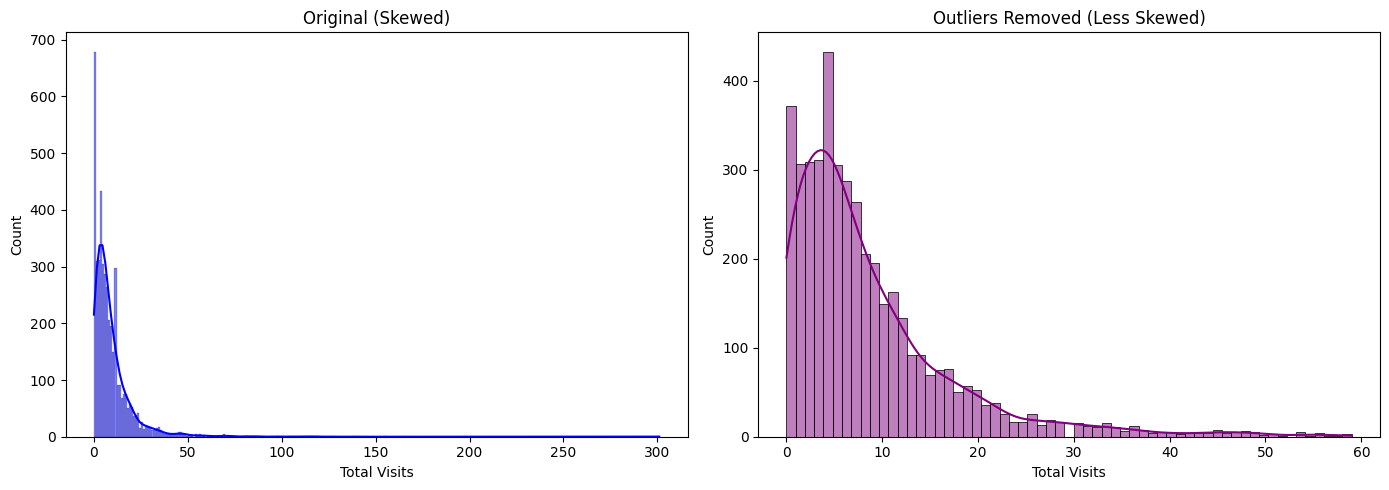

In [718]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df_fe['total_visits'], kde=True, color='blue')
plt.title("Original (Skewed)")
plt.xlabel("Total Visits")

# No Outliers
plt.subplot(1,2,2)
sns.histplot(tv_no_outliers, kde=True, color='purple')
plt.title("Outliers Removed (Less Skewed)")
plt.xlabel("Total Visits")

plt.tight_layout()
plt.show()

Look at this beautiful data we can really visualize compared to the original skewed graph. Removing the outliers really show us where exactly the peak is in the Standard Deviation.

We only had raw visit counts, which made it difficult to clearly distinguish heavy healthcare users from typical patients.

C:\Users\Juicy\AppData\Local\Temp\ipykernel_8520\3743006233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='high_utilizer', data=df_fe, palette='Set2')


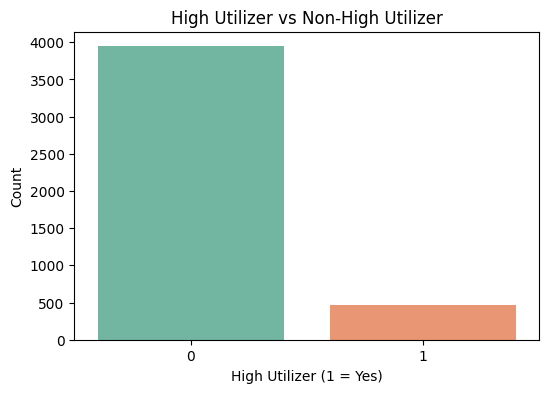

In [719]:
plt.figure(figsize=(6,4))
sns.countplot(x='high_utilizer', data=df_fe, palette='Set2')
plt.title("High Utilizer vs Non-High Utilizer")
plt.xlabel("High Utilizer (1 = Yes)")
plt.ylabel("Count")
plt.show()

By creating the high_utilizer flag and visualizing it, we can now clearly see how many patients fall into the top usage group versus the majority, revealing the imbalance between high and normal healthcare users.

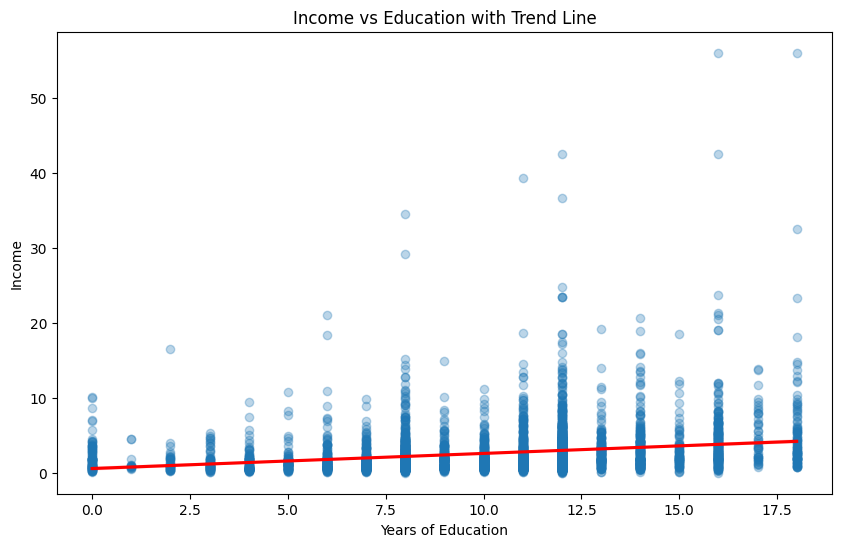

In [720]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_fe, x='school', y='income', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title("Income vs Education with Trend Line")
plt.xlabel("Years of Education")
plt.ylabel("Income")
plt.show()

Turns out showing this plot is not feature engineering. This is just analytical purposes.
Featuring engineering is that which you can create new variables from existing ones, that help a model learn better, predict better, or reveal clearer patterns.

### Real "More" Feature Engineering
I’m converting raw years of education into broader education levels (Primary, High School, College, Graduate) to make the feature easier to interpret and to use in grouped analyses.

In [721]:
# Education Level
df_fe['education_level'] = pd.cut(
    df_fe['school'],
    bins=[0, 8, 12, 16, 50],
    labels=['Primary', 'High School', 'College', 'Graduate']
)

Each row now has an `education_level` label that summarizes schooling into meaningful categories rather than just numeric years.

C:\Users\Juicy\AppData\Local\Temp\ipykernel_8520\1159844648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education_level', data=df_fe, palette='Blues')


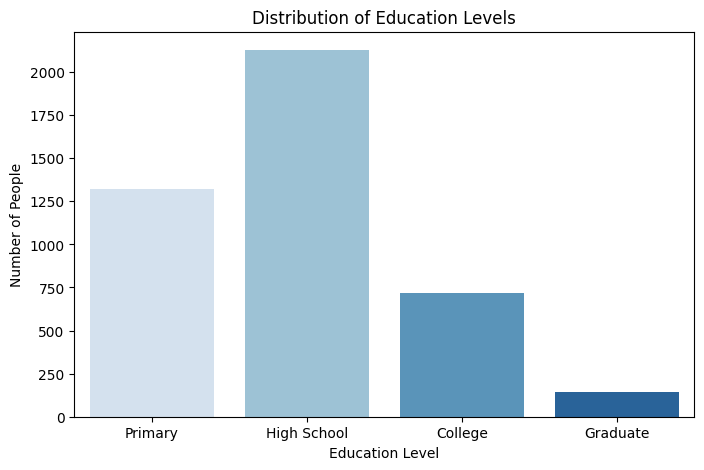

In [722]:
plt.figure(figsize=(8,5))
sns.countplot(x='education_level', data=df_fe, palette='Blues')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of People")
plt.show()

We can see which education group is most common (for example, High School or College) and which groups are smaller, giving context for later analyses involving education.

Because income is very skewed, I’m using a log transform (`income_log`) and then re-plotting its relationship with education to see the trend more clearly.

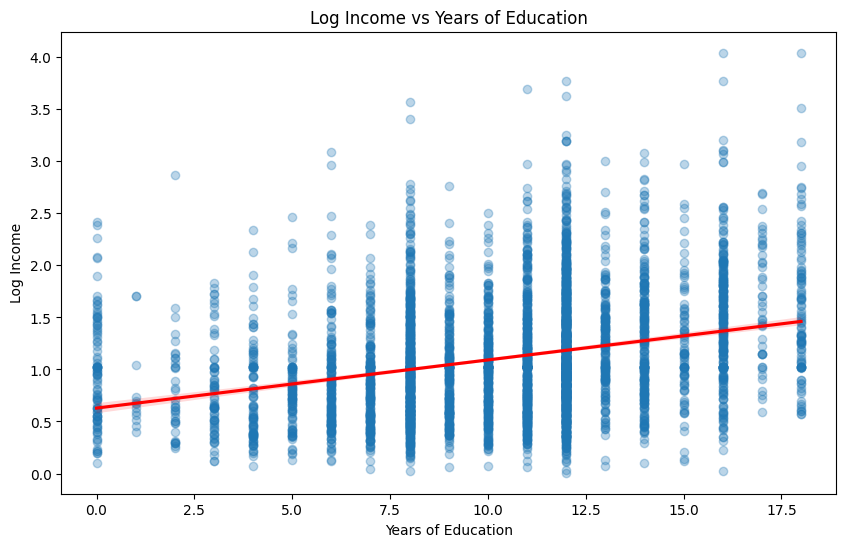

In [723]:
df_fe['income_log'] = np.log1p(df_fe['income'])

plt.figure(figsize=(10,6))
sns.regplot(data=df_fe, x='school', y='income_log',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title("Log Income vs Years of Education")
plt.xlabel("Years of Education")
plt.ylabel("Log Income")
plt.show()

The log transformation compresses extreme incomes and makes the upward relationship between schooling and income appear cleaner and more linear.

#### Ordinal Encoding for `health`

Now I’m turning the ordered `health` categories (poor < average < excellent) into numeric scores using `health_ord`. This lets models understand the ranking instead of treating the labels as unrelated strings.

In [724]:
# Ordinal encode health
if df_fe['health'].dtype == 'O':
    # Actual order poor < average < excellent
    health_order = ['poor', 'average', 'excellent']
    health_map = {cat: i+1 for i, cat in enumerate(health_order)}

    df_fe['health_clean'] = (
        df_fe['health']
        .astype(str)
        .str.strip()
        .str.lower()
    )
    df_fe['health_ord'] = df_fe['health_clean'].map(health_map)
else:
    df_fe['health_ord'] = df_fe['health']

print(df_fe['health'].value_counts(dropna=False))
print(df_fe['health_ord'].value_counts(dropna=False))

health
average      3483
poor          564
excellent     359
Name: count, dtype: int64
health_ord
2    3483
1     564
3     359
Name: count, dtype: int64


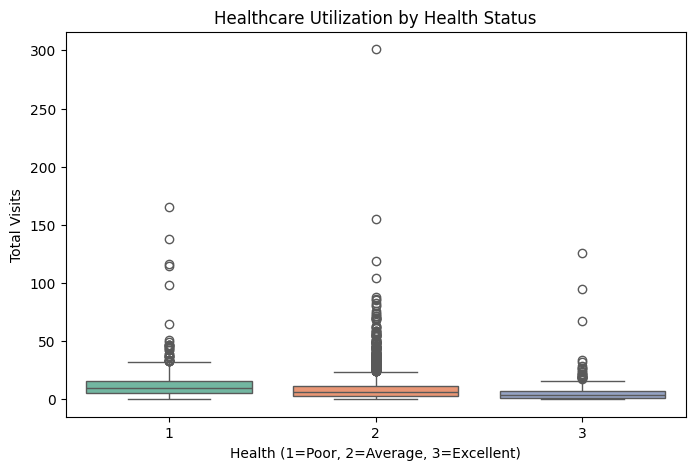

In [725]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='health_ord',
    y='total_visits',
    data=df_fe,
    hue='health_ord',        # tell seaborn to color by x
    palette='Set2',
    legend=False             # suppress redundant legend
)
plt.title("Healthcare Utilization by Health Status")
plt.xlabel("Health (1=Poor, 2=Average, 3=Excellent)")
plt.ylabel("Total Visits")
plt.show()

The boxplot shows how visit counts shift with self-reported health; for example, poorer health tends to be associated with higher total visits than excellent health.

The `health` and `adl` features are now encoded as ordered numeric scores (`health_ord`, `adl_ord`), which preserve the rank relationships between categories. This makes it easier for models to understand that “Good” health is better than “Fair,” instead of treating these values as unrelated labels.


### Scaling: Standardization and Normalization

The raw numeric features like `income` and `total_visits` are on very different scales and are highly skewed. I already applied log transforms to reduce skew (`income_log`, `total_visits_log`), but for modeling it is also useful to **standardize** and **normalize** these features.

Here I:
- Standardize: center and scale to mean 0 and standard deviation 1
- Normalize: rescale values into a [0, 1] range

This makes the features more comparable and model-friendly


In [726]:
# Make sure log features exist
if 'income_log' not in df_fe.columns:
    df_fe['income_log'] = np.log1p(df_fe['income'])
if 'total_visits_log' not in df_fe.columns:
    df_fe['total_visits_log'] = np.log1p(df_fe['total_visits'])

scale_cols = ['income_log', 'total_visits_log']

# Standardization
scaler_std = StandardScaler()
df_fe[['income_log_std', 'total_visits_log_std']] = scaler_std.fit_transform(df_fe[scale_cols])

# Min-Max Normalization [0, 1]
scaler_mm = MinMaxScaler()
df_fe[['income_log_norm', 'total_visits_log_norm']] = scaler_mm.fit_transform(df_fe[scale_cols])

df_fe[['income_log', 'income_log_std', 'income_log_norm']].head()

,income_log,income_log_std,income_log_norm
0,1.41,0.55,0.35
1,1.33,0.40,0.33
2,1.03,-0.15,0.25
3,0.64,-0.83,0.16
4,0.60,-0.90,0.15


The new columns (`*_std`, `*_norm`) contain scaled versions of the same information, now centered or squeezed into [0, 1], which makes them easier for models to work with.

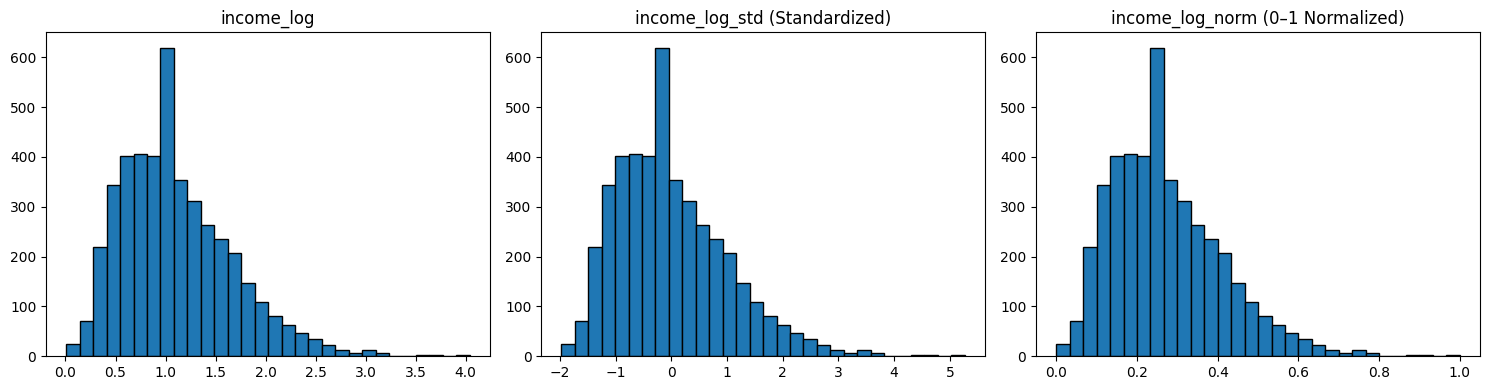

In [727]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

axs[0].hist(df_fe['income_log'], bins=30, edgecolor='black')
axs[0].set_title("income_log")

axs[1].hist(df_fe['income_log_std'], bins=30, edgecolor='black')
axs[1].set_title("income_log_std (Standardized)")

axs[2].hist(df_fe['income_log_norm'], bins=30, edgecolor='black')
axs[2].set_title("income_log_norm (0–1 Normalized)")

plt.tight_layout()
plt.show()

The scaled versions of the log-transformed features (`income_log_std`, `income_log_norm`, `total_visits_log_std`, `total_visits_log_norm`) now live on standardized or 0–1 ranges. The overall shape of the distributions stays similar to the log-transformed versions, but the scales are now consistent

### Conclusion
In this project I started with a messy, skewed healthcare dataset and gradually turned it into a cleaner, model-ready version. I identified impossible values (like negative visit counts and invalid ages), removed them, and used median imputation so missing values wouldn’t break the analysis. I then engineered more meaningful features such as `total_visits`, the `high_utilizer` flag, education level buckets, and log-transformed income to reveal clearer patterns in healthcare use and the relationship between education and earnings. Finally, I encoded ordered categories like `health` and scaled key numeric variables, preparing the dataset for downstream modeling while keeping the core distributions and real-world meaning intact.

### Summary
#### Exploratory Data Analysis (EDA)
During EDA, my focus was on understanding the dataset before touching anything. I used summary statistics and visualizations to spot skewness, outliers, and impossible values like negative visit counts. This stage taught me that EDA isn’t just “looking at graphs,” but actually discovering the story and structure of the data. I also realized how easy it is to overlook parts of the dataset like categorical variables and that good EDA is about clarity and relevance, not overwhelming the audience with every plot possible.

---

#### Data Wrangling
Data wrangling became the most enjoyable part for me. I learned how to clean the data carefully without damaging real patterns removing negative values, fixing unrealistic entries, converting decimals to whole numbers, and imputing missing values. At first, it was frustrating that the visual differences weren’t obvious, but I eventually understood that small, targeted fixes are still meaningful. This stage helped me see the importance of accuracy, realism, and preserving data integrity instead of blindly transforming everything.

---

#### Feature Engineering
Feature engineering changed how I think about data. Instead of only analyzing what existed, I learned how to create new, meaningful features like total visits, high utilizer flags, education levels, and log-transformed income. This showed me that feature engineering isn’t random calculations; it’s thoughtful design based on the story the data is telling. It requires creativity, domain understanding, and intention. Even though stats felt challenging, this process made me appreciate how new features can reveal clearer insights and support future modeling.

---

Overall, moving through EDA → Wrangling → Feature Engineering helped me build structure in my thinking and made the project feel like a real analytical journey rather than just a collection of charts and numbers.
